In [189]:
import itertools
from functools import partial

import geopandas as gpd
import numpy as np
import pandas as pd
import vsketch
from fn.fn import new_savepath
from geodude.ops import (buft_fill, form_affine_basis,
                         get_affine_transformation, make_like)
from geodude.utils import (Paper, flatten_geoms, merge_LineStrings,
                           merge_Polygons)
from matplotlib import pyplot as plt
from PIL import Image
from shapely import is_valid, unary_union
from shapely.affinity import affine_transform
from shapely.geometry import (LineString, MultiLineString, MultiPoint,
                              MultiPolygon, Point, Polygon, box)
from shapely.ops import nearest_points

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
# make page
paper_size = '11x14 inches'
border:float=10
paper = Paper(paper_size)

drawbox = paper.get_drawbox(border)

In [250]:
fp = '/Users/alexandernaka/Downloads/0064-20210830-082314_878549--6610dda_painting_of_a_girl_next_to_a_sleepy_dog_4calm,_love_and_happinessabstract,_minimalist_5sunset_colors_5.png'
fp = '/Users/alexandernaka/Downloads/0_3.png'
# fp = '/Users/alexandernaka/Downloads/naka_Remixing_image_with_prompt_anime_action_illustration_of_a__cc6d5787-5790-4465-88d8-abc69269b112.png'
fp = '/Users/alexandernaka/Downloads/Studio_Project (1) (1).jpeg'
fp = '/Users/alexandernaka/Downloads/Studio_Project (1) (2).jpeg'

In [251]:
# read image
img = Image.open(fp)

# convert image to grayscale
gray = img.convert('L')

In [252]:
# downsample image
x_scale = 0.25
y_scale = 0.125
smallgray = gray.resize((int(gray.size[0] * x_scale), int(gray.size[1] * y_scale)), Image.LANCZOS)

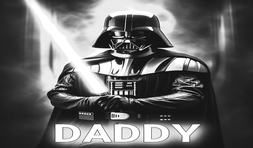

In [253]:
smallgray

In [254]:
arr = np.array(smallgray)

In [255]:
waves = []


def get_sin_wave(amplitude=10, frequency=1, phase=0, n_points=100):
    return amplitude * np.sin(frequency * np.linspace(0, np.pi*2, n_points) + phase)

n_points = 20

for ii, row in enumerate(arr):
    for jj, val in enumerate(row):
        darkness = (256 - val) / 255 
        # darkness = 1 - darkness
        amplitude = darkness * 4
        x_start = jj / x_scale
        y_start = ii / y_scale
        xs = np.linspace(0, 1, n_points) / x_scale + x_start
        ys = get_sin_wave(amplitude=amplitude, frequency=1, phase=0, n_points=n_points) + y_start
        ls = LineString(zip(xs, ys))
        waves.append(ls)

In [256]:
mls = MultiLineString(waves)

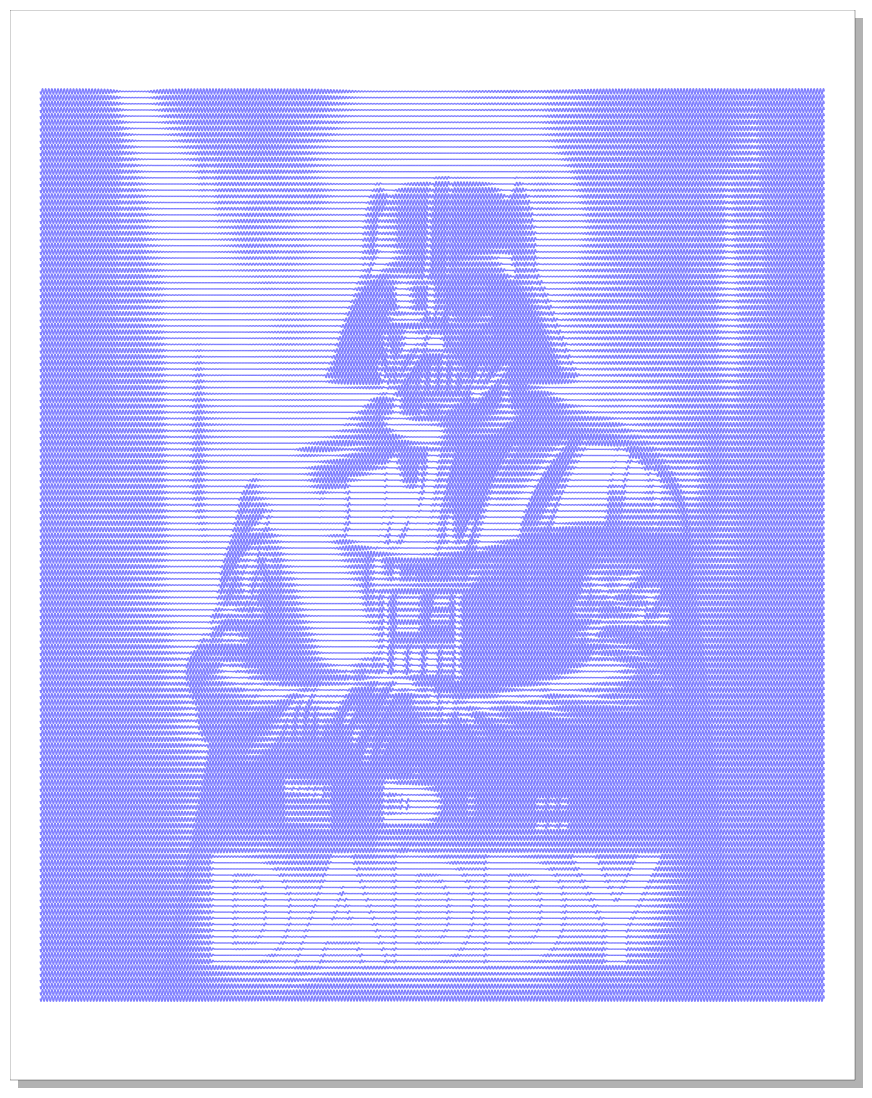

In [257]:
sk = vsketch.Vsketch()
sk.scale('1mm')
sk.penWidth('0.05mm')
sk.size(paper.page_format_mm)
sk.geometry(make_like(mls, drawbox))
sk.display(fig_size=(11, 14))

In [258]:
sk.vpype('linemerge linesort')
fp = new_savepath(postfix='vader_daddy')
sk.save(fp)